<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/%08abep06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   OpenCV를 활용한 영상처리

---
##▶︎ 오늘 강의내용
*   Image Gradient 이해
*   커널(Kernel) & 컨볼루션(Convolution) 활용한 Edge 추출
*   Gaussian Pyramid란

---
##▶︎ 먼저해야될 일: 파일 업로드 및 경로 설정
  1.   좌측 카테고리에서 파일선택
  2.   images 폴더 생성하기
  3.   "공유드라이브 >>> image04_2.zip" 압축 해제 후 생성한 폴더에 업로드 하기
  4.   폴더 경로를 받을 변수 설정하기

---
##⦿   Edge detection - Image Gradient
![Alt Text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Gradient2.svg/2880px-Gradient2.svg.png)
  -   Image Gradient
$$
\nabla f=\begin{bmatrix}
g_{x} \\
g_{y}
\end{bmatrix} = \begin{bmatrix}
\frac{\partial f}{\partial x} \\
\frac{\partial f}{\partial y}
\end{bmatrix}
\\
\frac{\partial f}{\partial x}: x 방향에 대한 미분\\
\frac{\partial f}{\partial y}: y 방향에 대한 미분
$$

*   불연속적인 값을 가지는 영상의 경우 2&times;1 필터는 계산이 힘들기 때문에 3&times;1 필터를 주로 활용

$$
\frac{\partial f}{\partial y} = \begin{bmatrix} -1 \\ +1 \end{bmatrix} * \mathbf{A} ➡
\begin{bmatrix} -1 \\0 \\+1 \end{bmatrix} * \mathbf{A} 
$$


*   미분의 방향 및 각도의 경우 아래의 식을 활용
    
$$
\theta =  \operatorname{tan{^-}{^1}} \left [ \frac{g_{y}}{g_{x}} \right ]
$$


*   미분의 크기의 경우 아래의 식을 활용

$$
\sqrt{g_{y}^{2} + g_{x}^{2}}
$$


(-0.5, 211.5, 157.5, -0.5)

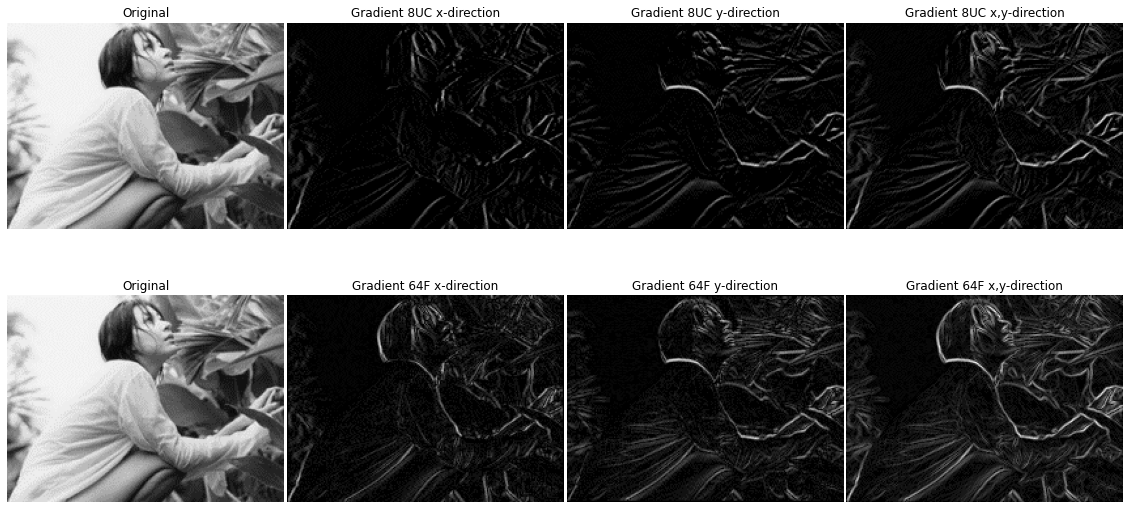

In [2]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"))

G_x = np.array([[-1., 0., 1.]])
G_y = np.array([[-1.], [0.], [1.]])

edge_x = cv2.filter2D(img, cv2.CV_8UC1, G_x)
edge_y = cv2.filter2D(img, cv2.CV_8UC1, G_y)

edge_x_y = np.power(edge_x.astype(np.float32),2) +np.power(edge_y.astype(np.float32),2)
edge_x_y = np.sqrt(edge_x_y)
edge_x_y[edge_x_y > 255] = 255
edge_x_y = edge_x_y.astype(np.uint8)

ax[0][0].imshow(img)
ax[0][0].set_title("Original")
ax[0][0].axis("off")

ax[0][1].imshow(edge_x)
ax[0][1].set_title("Gradient 8UC x-direction")
ax[0][1].axis("off")

ax[0][2].imshow(edge_y)
ax[0][2].set_title("Gradient 8UC y-direction")
ax[0][2].axis("off")

ax[0][3].imshow(edge_x_y)
ax[0][3].set_title("Gradient 8UC x,y-direction")
ax[0][3].axis("off")

# uint8 -> 64 float
edge_x = cv2.filter2D(img, cv2.CV_64F, G_x)
edge_y = cv2.filter2D(img, cv2.CV_64F, G_y)
edge_x = np.uint8(np.absolute(edge_x))
edge_y = np.uint8(np.absolute(edge_y))

edge_x_y = np.power(edge_x.astype(np.float32),2) +np.power(edge_y.astype(np.float32),2)
edge_x_y = np.sqrt(edge_x_y)
edge_x_y[edge_x_y > 255] = 255
edge_x_y = edge_x_y.astype(np.uint8)

ax[1][0].imshow(img)
ax[1][0].set_title("Original")
ax[1][0].axis("off")

ax[1][1].imshow(edge_x)
ax[1][1].set_title("Gradient 64F x-direction")
ax[1][1].axis("off")

ax[1][2].imshow(edge_y)
ax[1][2].set_title("Gradient 64F y-direction")
ax[1][2].axis("off")

ax[1][3].imshow(edge_x_y)
ax[1][3].set_title("Gradient 64F x,y-direction")
ax[1][3].axis("off")

---
##⦿   Edge Detection - 1차 미분(1st order gradient)

###•   Prewitt
* 1D Average + 1D Gradient
* Prewitt x 방향
$$
\begin{bmatrix} 1 \\ 1\\ 1 \end{bmatrix} * 
\begin{bmatrix} 1 & 0 & -1 \end{bmatrix} = 
\begin{bmatrix}
+1 & 0 & -1\\ +1 & 0 & -1 \\ +1 & 0 & -1
\end{bmatrix}
$$

* Prewitt y 방향
$$
\begin{bmatrix} 1 \\ 0 \\ -1 \end{bmatrix} *
\begin{bmatrix} 1 & 1 & 1 \end{bmatrix} = 
\begin{bmatrix}
+1 & +1 & +1 \\ 0 & 0 & 0 \\ -1 & -1 & -1
\end{bmatrix}
$$

(-0.5, 211.5, 157.5, -0.5)

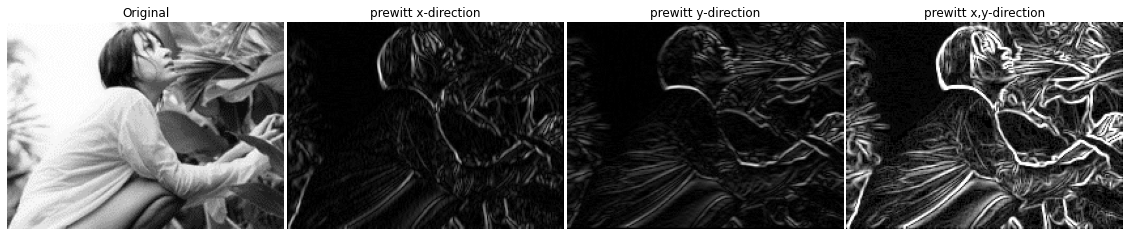

In [5]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"), 0)

prewitt_fx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_fy = np.array([[-1, -1, -1], [0, 0, 0], [1,1,1]])

prewitt_x = cv2.filter2D(img, cv2.CV_64F, prewitt_fx)
prewitt_y = cv2.filter2D(img, cv2.CV_64F, prewitt_fy)
prewitt_x = np.absolute(prewitt_x)
prewitt_y = np.absolute(prewitt_y)

prewitt_x_y = np.power(prewitt_x.astype(np.float32),2) +np.power(prewitt_y.astype(np.float32),2)
prewitt_x_y = np.sqrt(prewitt_x_y)
prewitt_x_y[prewitt_x_y > 255] = 255
prewitt_x_y = np.uint8(prewitt_x_y)

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(prewitt_x, cmap="gray")
ax[1].set_title("prewitt x-direction")
ax[1].axis("off")

ax[2].imshow(prewitt_y, cmap="gray")
ax[2].set_title("prewitt y-direction")
ax[2].axis("off")

ax[3].imshow(prewitt_x_y, cmap="gray")
ax[3].set_title("prewitt x,y-direction")
ax[3].axis("off")

###•   Sobel
* 1D Gaussian + 1D Gradient
* Sobel x 방향

$$
\begin{bmatrix} 1 \\ 2\\ 1 \end{bmatrix} * 
\begin{bmatrix} -1 & 0 & 1 \end{bmatrix} = 
\begin{bmatrix}
-1 & 0 & +1\\ -2 & 0 & +2 \\ -1 & 0 & +1
\end{bmatrix}
$$

* Sobel y 방향

$$
\begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix} *
\begin{bmatrix} 1 & 2 & 1 \end{bmatrix} = 
\begin{bmatrix}
-1 & -2 & -1\\ 0 & 0 & 0 \\ +1 & +2 & +1
\end{bmatrix}
$$

(-0.5, 211.5, 157.5, -0.5)

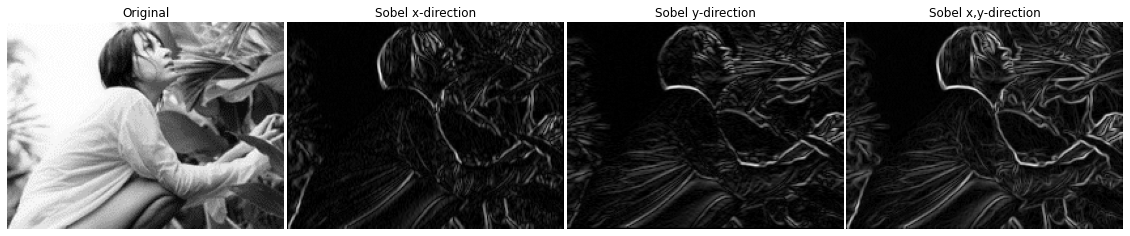

In [3]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"), 0)

sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_x = cv2.normalize(np.absolute(sobel_x), None, 0, 255, cv2.NORM_MINMAX)
sobel_y = cv2.normalize(np.absolute(sobel_y), None, 0, 255, cv2.NORM_MINMAX)

sobel_x_y = np.power(sobel_x.astype(np.float32),2) +np.power(sobel_y.astype(np.float32),2)
sobel_x_y = np.sqrt(sobel_x_y)
sobel_x_y[sobel_x_y > 255] = 255
sobel_x_y = np.uint8(sobel_x_y)

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap="gray")
ax[1].set_title("Sobel x-direction")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap="gray")
ax[2].set_title("Sobel y-direction")
ax[2].axis("off")

ax[3].imshow(sobel_x_y, cmap="gray")
ax[3].set_title("Sobel x,y-direction")
ax[3].axis("off")

###•   Scharr
* Sobel 근사식으로 소실되는 정보를 보정하는 효과
* Scharr x 방향
$$
\begin{bmatrix}
+3 & 0 & -3\\ +10 & 0 & -10 \\ +3 & 0 & -3
\end{bmatrix}
$$

* Scharr y 방향
$$
\begin{bmatrix}
+3 & +10 & +3\\ 0 & 0 & 0 \\ -3 & -10 & -3
\end{bmatrix}
$$

(-0.5, 211.5, 157.5, -0.5)

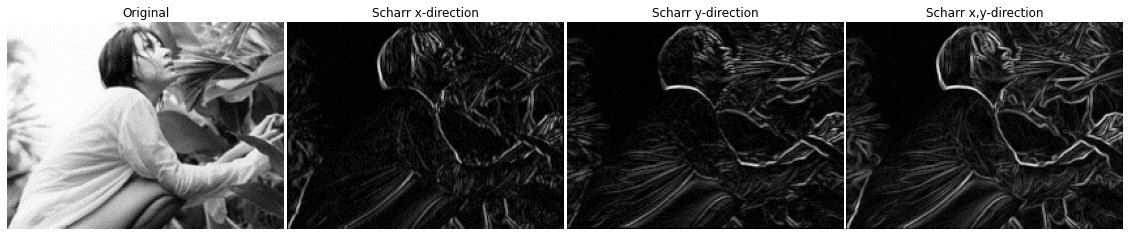

In [4]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"), 0)

scharr_x = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharr_y = cv2.Scharr(img, cv2.CV_64F, 0, 1)
scharr_x = cv2.normalize(np.absolute(scharr_x), None, 0, 255, cv2.NORM_MINMAX)
scharr_y = cv2.normalize(np.absolute(scharr_y), None, 0, 255, cv2.NORM_MINMAX)

scharr_x_y = np.power(scharr_x,2) + np.power(scharr_y,2)
scharr_x_y = np.sqrt(scharr_x_y)
scharr_x_y[scharr_x_y > 255] = 255
scharr_x_y = np.uint8(scharr_x_y)

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")

ax[1].imshow(scharr_x, cmap="gray")
ax[1].set_title("Scharr x-direction")
ax[1].axis("off")

ax[2].imshow(scharr_y, cmap="gray")
ax[2].set_title("Scharr y-direction")
ax[2].axis("off")

ax[3].imshow(scharr_x_y, cmap="gray")
ax[3].set_title("Scharr x,y-direction")
ax[3].axis("off")

---
##⦿   Edge Detection - 2차 미분(2nd order gradient)

###•   Laplacian  
- 라플라시안 연산자의 경우 발산하는 성질을 가지고 있기 때문에 밝기가 서서히 변하는 엣지에 대해서는 반응하지 않음
- 1차 미분 연산자와 다르게 엣지를 보다 샤프하게 검출
$$
Laplace(f) = \dfrac{\partial^{2} f}{\partial x^{2}} + \dfrac{\partial^{2} f}{\partial y^{2}}
$$
- 3 × 3 Filter
$$
\dfrac{\partial^{2} f}{\partial x^{2}} = f(x+1) + f(x-1) -2f(x) = 
\begin{bmatrix}1 & -2 & 1\end{bmatrix}\\
\dfrac{\partial^{2} f}{\partial y^{2}} = f(y+1) + f(y-1) -2f(y) = 
\begin{bmatrix}1 \\ -2 \\ 1\end{bmatrix}
\\
\begin{bmatrix}
0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix} or \begin{bmatrix}
1 & 1 & 1 \\ 1 & -8 & 1 \\ 1 & 1 & 1
\end{bmatrix}
$$


Text(0.5, 1.0, 'Laplacian_8')

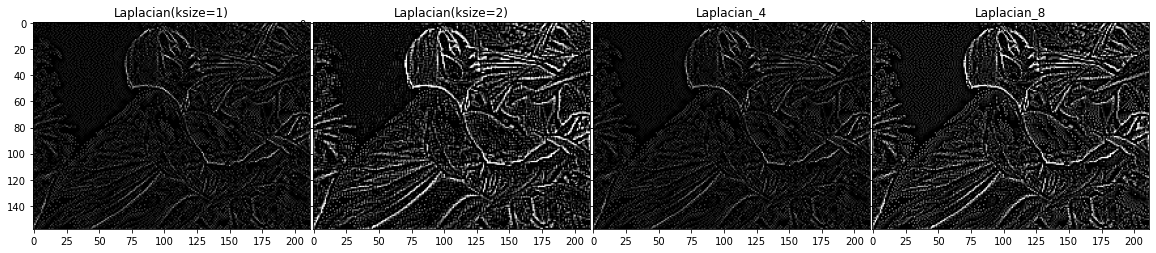

In [6]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"), 0)

laplacian1 = cv2.Laplacian(img, -1)
laplacian2 = cv2.Laplacian(img, -1, ksize=3)

laplacian_filter1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_filter2 = np.array([[1,1,1], [1, -8, 1], [1,1,1]])
laplacian_4 = cv2.filter2D(img, -1, laplacian_filter1)
laplacian_8 = cv2.filter2D(img, -1, laplacian_filter2)

ax[0].imshow(laplacian1, cmap="gray")
ax[0].set_title('Laplacian(ksize=1)')

ax[1].imshow(laplacian2, cmap="gray")
ax[1].set_title('Laplacian(ksize=2)')

ax[2].imshow(laplacian_4, cmap="gray")
ax[2].set_title('Laplacian_4')

ax[3].imshow(laplacian_8, cmap="gray")
ax[3].set_title('Laplacian_8')

---
###• LoG
  - 가우시안 필터 후 라플라시안 연산을 진행
  - 잡음에 민감한 라플라시안을 보완하기 위해 Gaussian Blur 진행
![Alt Text](https://sunshower76.github.io/public/img/LOG_DOG/img_3.png)[Reference]

$$
\
{∇}^{2} (f*g) = f*{∇}^{2}g
$$


(-0.5, 211.5, 157.5, -0.5)

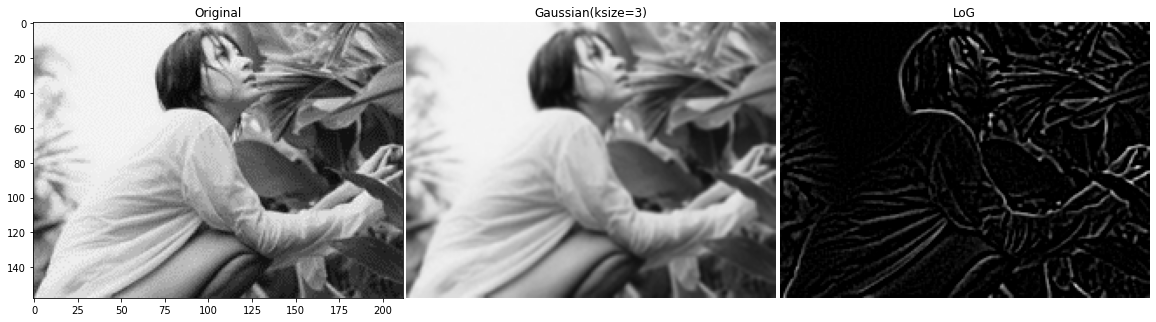

In [7]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"))

mask3 = np.array([[-1,-1,-1], [-1, 8, -1], [-1, -1, -1]])
gaussian_img = cv2.GaussianBlur(img, (3,3), 1.0)
log_img = cv2.filter2D(gaussian_img, -1, mask3)

ax[0].imshow(img, cmap="gray")
ax[0].set_title('Original')

ax[1].imshow(gaussian_img, cmap="gray")
ax[1].set_title('Gaussian(ksize=3)')
ax[1].axis("off")

ax[2].imshow(log_img, cmap="gray")
ax[2].set_title('LoG')
ax[2].axis("off")

###• DoG
- 서로다른 표준편차를 가지는 Gaussian 필터 적용 후, 뺄셈을 적용한 것
- LoG 근사값을 가짐

(-0.5, 211.5, 157.5, -0.5)

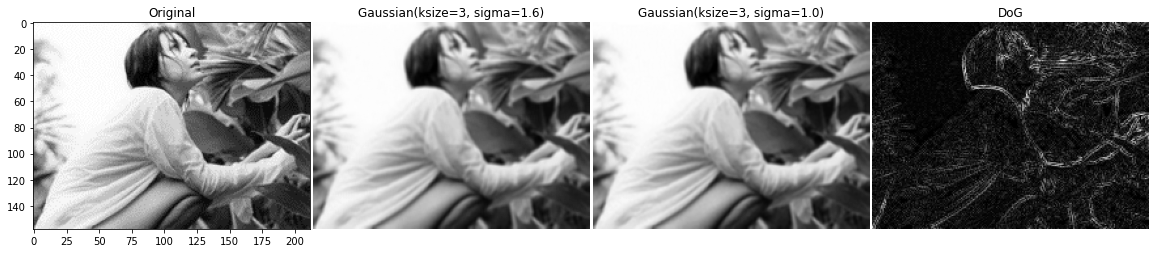

In [8]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 4, figsize=(20,10))
plt.subplots_adjust(wspace=0.01, hspace = .005)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "Woman.bmp"), 0)
img = np.float32(img)

height, width = img.shape

gaussian1 = cv2.GaussianBlur(img, (3,3), 1.6)
gaussian2 = cv2.GaussianBlur(img, (3,3), 1.0)
dog_img = cv2.subtract(gaussian2, gaussian1)
dog_img = np.absolute(dog_img)
dog_img = cv2.normalize(dog_img, None, 0, 255, cv2.NORM_MINMAX)

ax[0].imshow(img, cmap="gray")
ax[0].set_title('Original')

ax[1].imshow(gaussian1, cmap="gray")
ax[1].set_title('Gaussian(ksize=3, sigma=1.6)')
ax[1].axis("off")

ax[2].imshow(gaussian2, cmap="gray")
ax[2].set_title('Gaussian(ksize=3, sigma=1.0)')
ax[2].axis("off")

ax[3].imshow(dog_img, cmap="gray")
ax[3].set_title('DoG')
ax[3].axis("off")

---
##⦿   Image Pyramid
  -   이미지의 크기를 피라미드처럼 단계적으로 확대 또는 축소하는 작업
  -   종류
      -   Gaussian Pyramid: Gaussian Blur 적용 후, 확대 축소하는 작업 
      -   Laplacian Pyramid: Gaussian Pyramid 적용된 계층적 이미지간의 차이

(0.0, 1.0, 0.0, 1.0)

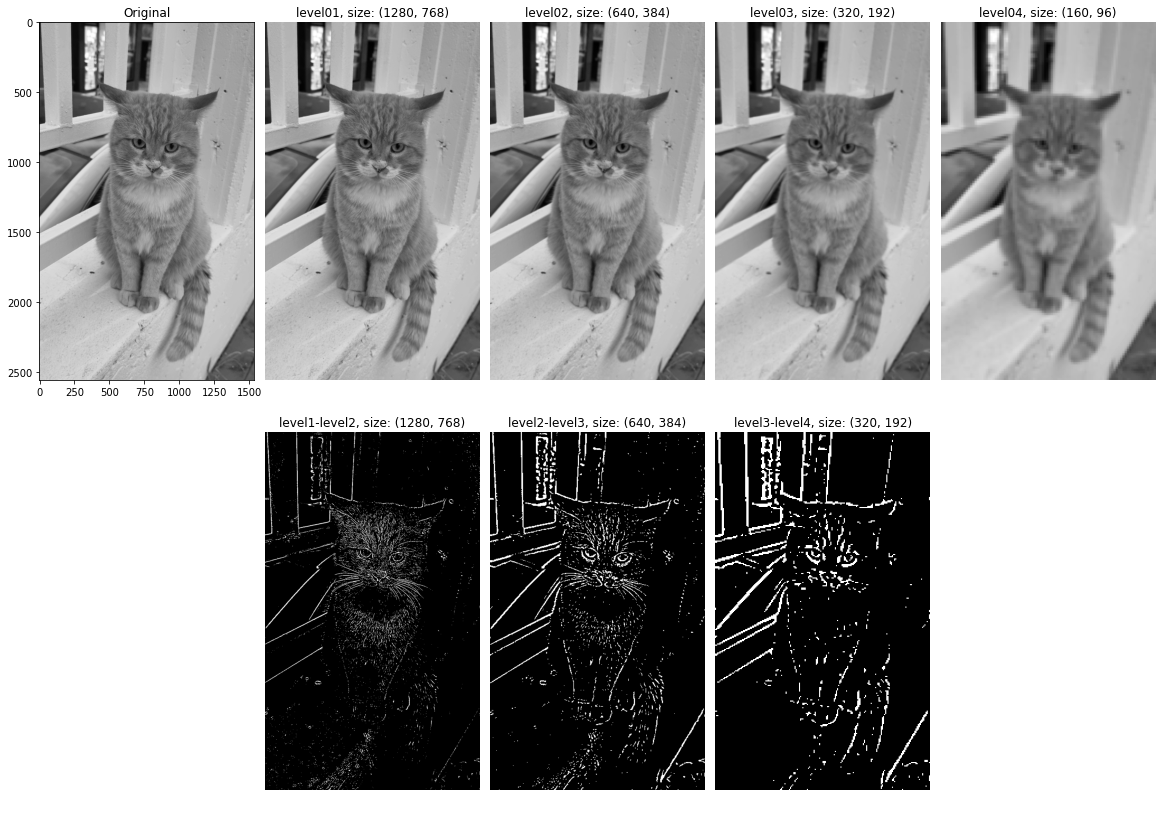

In [9]:
import os
import cv2.cv2
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(20,15))
plt.subplots_adjust(wspace=.05, hspace = .01)

image_root_path = "/content/images"
img = cv2.imread(os.path.join(image_root_path, "cat1.jpeg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# =======================================================
# Cropping, 이미지가 너무 커서 자르겠습니다, numpy Slice를 활용
loc=(0,0) # location(loc): 0,3 
cat_box = [720, 560, 2256, 3120]  # x_min, y_min, x_max, y_max 2048+512 = 2560
img = img[cat_box[1]:cat_box[3], cat_box[0]:cat_box[2]]  # 고양이 부분 좌표
ax[0][0].imshow(img, cmap="gray")
ax[0][0].set_title("Original")

temp_img = img.copy()

pyrmid_images = []
for i in range(1, 5):
  temp_img = cv2.pyrDown(temp_img)
  ax[0][i].imshow(temp_img, cmap="gray")
  ax[0][i].set_title(f"level{i:02}, size: {temp_img.shape}")
  ax[0][i].axis("off")
  pyrmid_images.append(temp_img)

level4 = pyrmid_images[-1]
level3 = pyrmid_images[-2]
level2 = pyrmid_images[-3]
level1 = pyrmid_images[-4]
# leval3 - level4
diff3 = cv2.subtract(level3, cv2.pyrUp(level4))
diff3 = cv2.normalize(diff3, None, 0, 255, cv2.NORM_MINMAX)
_,diff3 = cv2.threshold(diff3, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ax[1][-2].imshow(diff3, cmap="gray")
ax[1][-2].set_title(f"level3-level4, size: {diff3.shape}")
ax[1][-2].axis("off")

# leval2 - level3
diff2 = cv2.subtract(level2, cv2.pyrUp(level3))
diff2 = cv2.normalize(diff2, None, 0, 255, cv2.NORM_MINMAX)
_,diff2 = cv2.threshold(diff2, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ax[1][-3].imshow(diff2, cmap="gray")
ax[1][-3].set_title(f"level2-level3, size: {diff2.shape}")
ax[1][-3].axis("off")

# leval1 - level2
diff1 = cv2.subtract(level1, cv2.pyrUp(level2))
diff1 = cv2.normalize(diff1, None, 0, 255, cv2.NORM_MINMAX)
_,diff1 = cv2.threshold(diff1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ax[1][-4].imshow(diff1, cmap="gray")
ax[1][-4].set_title(f"level1-level2, size: {diff1.shape}")
ax[1][-4].axis("off")

ax[1][0].axis("off")
ax[1][-1].axis("off")

##   참고자료
*   https://076923.github.io/posts/Python-opencv-21/
*   https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html
*   https://talkingaboutme.tistory.com/entry/OpenCV-Scharr-filter
*   https://github.com/YasinEnigma/Image_Interpolation
*   https://sunshower76.github.io/cv(computervision)/2020/03/23/Laplacian-of-Gaussian(LoG)-&-Difference-of-Gaussian(DoG)/
*   https://medium.com/temp08050309-devpblog/cv-3-gradient-and-laplacian-filter-difference-of-gaussians-dog-7c22e4a9d6cc